In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt


In [2]:
pwd

'/Users/munjismac/code/munjik/personal-projects/breast_cancer'

In [3]:
df = pd.read_csv('/Users/munjismac/code/munjik/personal-projects/breast_cancer/data.csv')

In [4]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [5]:
df.shape

(569, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df = df.drop(columns='Unnamed: 32')

In [9]:
df.shape

(569, 32)

In [10]:
df['diagnosis'].nunique()

2

In [11]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

/Users/munjismac/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

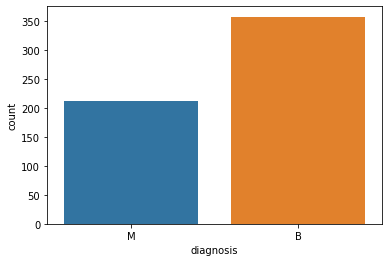

In [12]:
sns.countplot(df['diagnosis'])


In [13]:
df.dtypes
df = df.drop(columns=['id'])

In [14]:
# encode our values
# ML algorithms assume order for features but not for targets
le= LabelEncoder()
le.fit(df[['diagnosis']])
le.transform(df[['diagnosis']])

/Users/munjismac/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [15]:
df['diagnosis'] = le.transform(df[['diagnosis']])

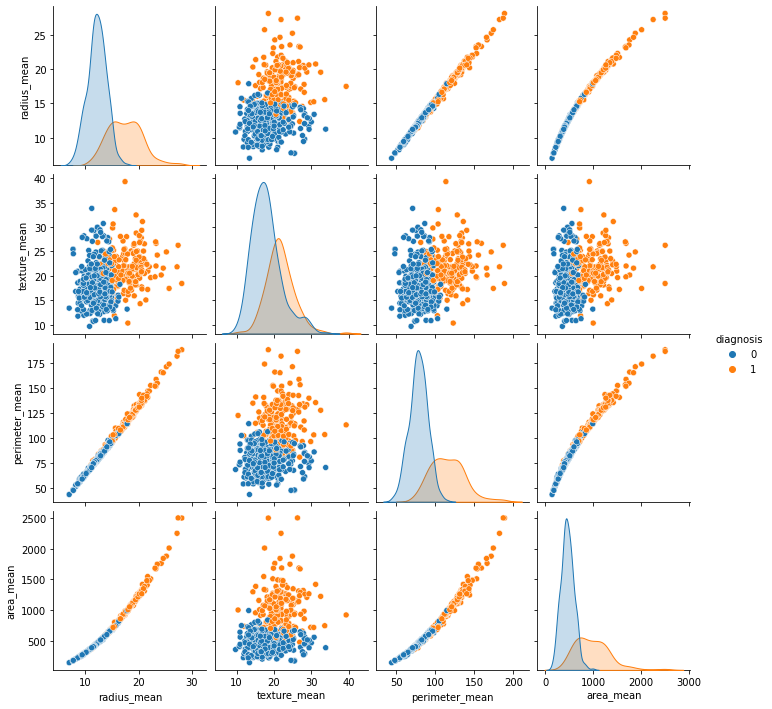

In [20]:
# create a pair plot
sns.pairplot(df.iloc[:,0:5], hue='diagnosis')

In [17]:
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


<AxesSubplot:>

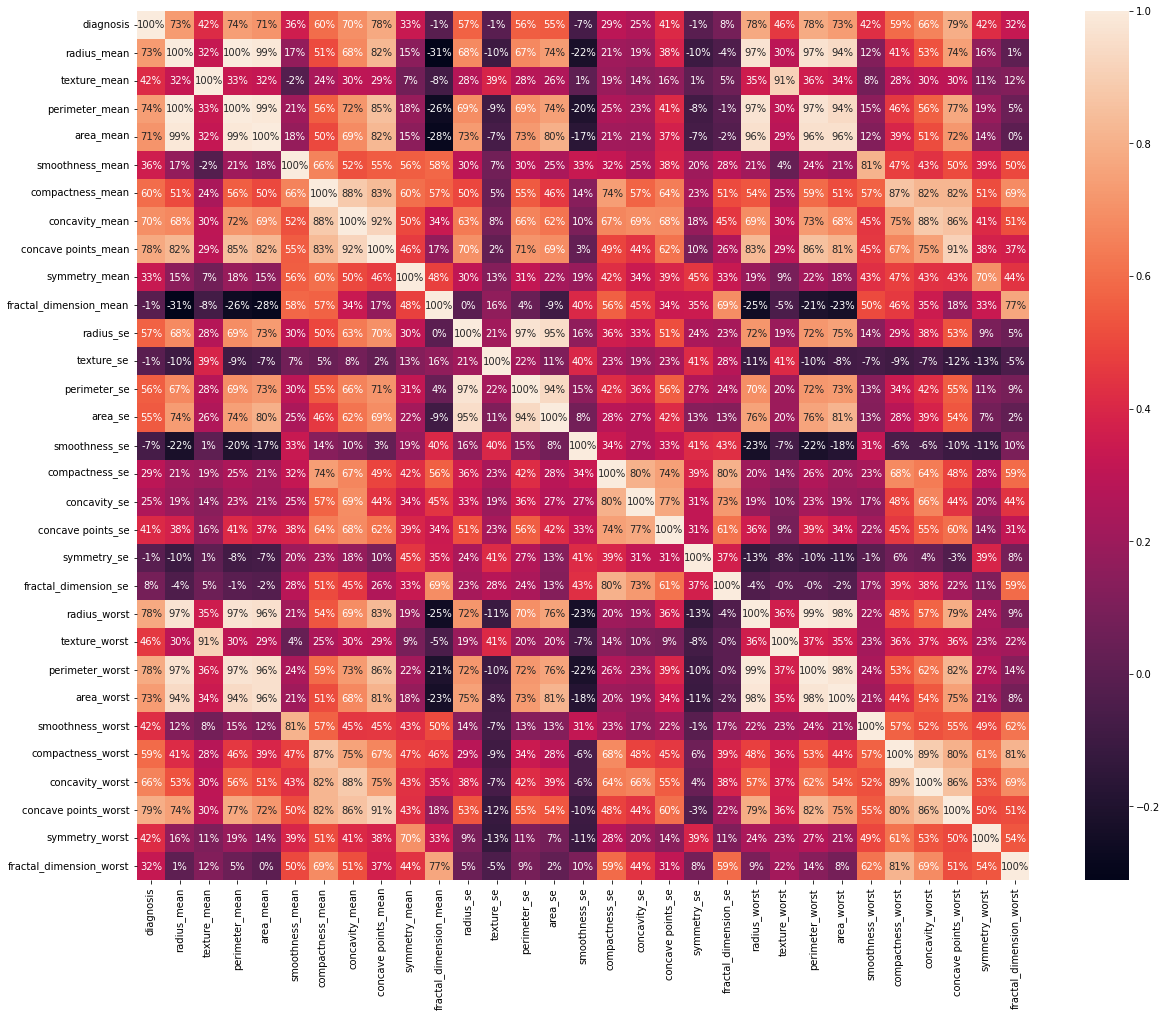

In [38]:
corr = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, fmt='.0%')


In [49]:
# WRAPPER METHODS
# 1.) Step Forward Selection
"""Forward selection is an iterative method in which we start with having no feature in the model. In each iteration,
we keep adding the feature which best improves our model till an addition of a new variable does not improve the 
performance of the model."""
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.neighbors import KNeighborsClassifier

In [44]:
X = df.drop(columns='diagnosis')
y = df['diagnosis']

In [50]:
model = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state=0)

In [52]:
#build step forward feature selection
sffs = sfs(model,k_features=10, forward=True, floating=False, scoring='accuracy', verbose = 2, cv=5)
sffs = sffs.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished

[2022-01-06 17:08:56] Features: 1/10 -- score: 0.9045569620253164[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.4s finished

[2022-01-06 17:08:56] Features: 2/10 -- score: 0.929746835443038[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.4s finished

[2022-01-06 17:08:57] Features: 3/10 -- score: 0.9372151898734176[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [53]:
feat_cols = list(sffs.k_feature_idx_)
feat_cols

[4, 6, 7, 9, 14, 16, 17, 18, 19, 24]

In [62]:
X.columns[feat_cols]

Index(['smoothness_mean', 'concavity_mean', 'concave points_mean',
       'fractal_dimension_mean', 'smoothness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst'],
      dtype='object')

In [67]:
X_cols = X.columns[feat_cols]
X_cols = df[X_cols]

In [69]:
# feature scaling
"""Algorithms that require Feature Scaling:
• Linear Regression
• Logistic Regression
• KNN
• SVM
• KMeans
• Hierarchical clustering
• Neural Networks"""

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #instantiate
scaler.fit(X_train) #fit scaler to feature
X_train_rescaled = scaler.transform(X_train) #scale

In [75]:
X_test_rescaled = scaler.transform(X_test)

In [78]:
from sklearn.model_selection import cross_validate
# train model with cv of 5
cv_scores = cross_validate(model, X_train_rescaled, y_train, cv = 5)
score = np.mean(cv_scores['test_score'])
score = score * 100

In [83]:
score

95.22784810126582

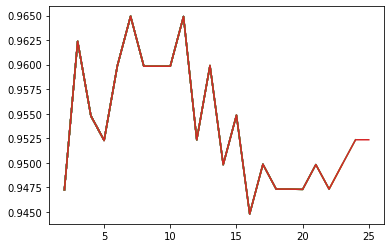

In [80]:
score_list = []
k_list = []
for results in range(2,26):
    k_list.append(results)
    cv_results = cross_validate(KNeighborsClassifier(n_neighbors=results), X_train_rescaled, y_train, cv = 5)
    mean_score = np.mean(cv_results['test_score'])
    score_list.append(mean_score)
    plt.plot(k_list, score_list)

In [84]:
#best neighbor seems to be 7
best_model = KNeighborsClassifier(n_neighbors=7)
best_model.fit(X_train_rescaled, y_train)

KNeighborsClassifier()

In [85]:
best_model.score(X_test_rescaled, y_test)

0.9590643274853801

<h2>Lets try to make a function for multiple models </h2>

In [96]:
# logistic regression, SVM, and KNN
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [107]:
def all_models(X_train, y_train):
    #KNN Model
    knn = KNeighborsClassifier(n_neighbors=7)
    knn = knn.fit(X_train, y_train)
    #Support Vector Machines
    svc = SVC()
    svc = svc.fit(X_train, y_train)
    #Logistic Regression
    lr = LogisticRegression()
    lr = lr.fit(X_train, y_train)
    
    print("KNN Training Accuracy", knn.score(X_train,y_train))
    print("SVC Training Accuracy",svc.score(X_train,y_train))
    print("LR Training Accuracy" ,lr.score(X_train,y_train))
    return knn, svc, lr
    
    

In [114]:
models = all_models(X_train_rescaled, y_train)

KNN Training Accuracy 0.9723618090452262
SVC Training Accuracy 0.9824120603015075
LR Training Accuracy 0.9899497487437185


In [115]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, models[0].predict(X_test_rescaled))

In [116]:
cm

array([[107,   1],
       [  6,  57]])

In [121]:
for i in range(len(models)):
    cm = confusion_matrix(y_test, models[i].predict(X_test_rescaled))
    print("Model", i)
    TP = cm[0][0]
    TN = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
    print("Testing Accuracy = ", (TP + TN) / (TP + TN + FN + FP))

Model 0
Testing Accuracy =  0.9590643274853801
Model 1
Testing Accuracy =  0.9766081871345029
Model 2
Testing Accuracy =  0.9766081871345029
